- Reads in .txt files one at a time
- Grabs the title and splits the lines into character and dialogue
- Does some other cleaning
- Stores it in a df
- Adds the season number
- Saves it to only_spoken_text.csv

In [1]:
import spacy, os, re
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# old way
"""
for file in os.listdir("transcripts"):
    
    # Read in file
    f = open(os.path.join('transcripts', file), encoding='utf-8-sig')
    data = f.read()
    f.close()
    
    data = data.split('\n')
    # Split each line into character and line
    data = [[line.split(':')[0], " ".join(line.split(":")[1:])] for line in data]
    title = data[0]
    lines = data[1:]
        
    # Make new df and append it
    lines_df = pd.DataFrame(lines, columns=['Character', 'Line'])
    lines_df['Episode'] = [title[0]] * len(lines)
    all_lines_df = all_lines_df.append(lines_df, ignore_index=True)
"""

# Combine and Clean Data

In [167]:
all_lines_df = pd.DataFrame(columns=['Character', 'Line', 'Episode'])
for file in os.listdir("transcripts"):
    # Read in file
    f = open(os.path.join('transcripts', file), encoding='utf-8-sig')
    data = f.read()
    f.close()
    
    data = data.split('\n')
    title = data[0]
    lines = data[1:]
    # Split each line into character and line
    data = []
    for line in lines:
        if ':' in line:
            data.append([line.split(':')[0], " ".join(line.split(":")[1:])])
            continue
        if '[' in line: # might miss a handful of lines throughout the episodes
            continue
        if len(line) == 0: # removes blank lines (often one at beginning and/or end)
            continue
        # hopefully just text that belongs with above line left (ex. when characters are singing)
        txt = data.pop()
        txt[1] = txt[1] + " " + line
        data.append(txt)
          
    # Make new df and append it
    lines_df = pd.DataFrame(data, columns=['Character', 'Line'])
    lines_df['Episode'] = [title] * len(data)
    all_lines_df = all_lines_df.append(lines_df, ignore_index=True)

all_lines_df = all_lines_df[['Episode', 'Character', 'Line']]
all_lines_df['Character'] = all_lines_df['Character'].str.replace('Professor Farnsworth', 'Farnsworth')
# Fix titles so they match up with episode_list.csv - fixed in .txt files
#all_lines_df['Episode'] = all_lines_df['Episode'].str.replace('Bender Should Not Be Allowed on Television', 'Bender Should Not Be Allowed on TV')
#all_lines_df['Episode'] = all_lines_df['Episode'].str.replace('Less than Hero', 'Less Than Hero')
#all_lines_df['Episode'] = all_lines_df['Episode'].str.replace('Roswell that Ends Well', 'Roswell That Ends Well')
#all_lines_df['Episode'] = all_lines_df['Episode'].str.replace('I Second that Emotion', 'I Second That Emotion')
#all_lines_df['Episode'] = all_lines_df['Episode'].str.replace("Time Keeps on Slippin'", "Time Keeps On Slippin'")
#set(all_lines_df['Episode'].unique()).difference(set(episode_df['Title'])) # to check if all the titles matched up

# Get rid of scene text in [ ] (text in the transcripts that isn't spoken)
all_lines_df['Line'] = all_lines_df['Line'].apply(lambda x: re.sub('\s?\[(.*?)\]', '', x))

# Add season number
episode_df = pd.read_csv('episode_list.csv').drop(['Director(s)', 'Writer(s)', 'Air Date', 'Episode in Season'], axis=1)
all_lines_df = pd.merge(all_lines_df, episode_df, left_on='Episode', right_on='Title', copy=True)
all_lines_df.drop(['Episode_y', 'Title'], axis=1, inplace=True) # drop extra columns
all_lines_df.rename(columns={"Episode_x": "Episode"}, inplace=True) 
all_lines_df = all_lines_df[['Season', 'Episode', 'Character', 'Line']]

# Save it
#all_lines_df.to_csv("all_lines.csv", index=False)
#all_lines_df.to_csv("only_spoken_text.csv", index=False) # this one now

In [168]:
len(all_lines_df)

23812

# Testing

In [170]:
all_lines_df.head()

,Season,Episode,Character,Line
0,1,Space Pilot 3000,Fry,Space. It seems to go on and on forever. But ...
1,1,Space Pilot 3000,Fry,And that's how you play the game!
2,1,Space Pilot 3000,Boy,"You stink, loser!"
3,1,Space Pilot 3000,Panucci,"Hey, Fry. Pizza goin' out! C'mon!!"
4,1,Space Pilot 3000,Fry,"Michelle, baby! Where you going?"


In [169]:
all_lines_df[all_lines_df['Episode']=="Fry Am the Egg Man"][100:110]

,Season,Episode,Character,Line
2747,6,Fry Am the Egg Man,Fry,Yeah! Let's do those Leela things.
2748,6,Fry Am the Egg Man,Fry,"Well, buddy, how d'ya like your new home? See..."
2749,6,Fry Am the Egg Man,Hermes,"That thing doesn't have emotions, Fry. Its br..."
2750,6,Fry Am the Egg Man,Fry,So are walnuts and they're delicious. I'll mi...
2751,6,Fry Am the Egg Man,Leela,"Come on, Fry. Let's go home an'—"
2752,6,Fry Am the Egg Man,Bender,Hold up! There's alcohol around here somewher...
2753,6,Fry Am the Egg Man,Zoidberg,We're not from around here. Hello!
2754,6,Fry Am the Egg Man,Man #1,
2755,6,Fry Am the Egg Man,Hermes,"Excuse me, but we're guests on your planet. S..."
2756,6,Fry Am the Egg Man,Man #2,"Behave yourselves, gents. Off-worlders best b..."


In [166]:
all_lines_df[all_lines_df['Line']==""]
# remaining lines were just something in [ ]

,Episode,Character,Line,Season
2754,Fry Am the Egg Man,Man #1,,6
19830,Bender's Game Part 1,ALL,,5
20442,Bender's Game Part 4,ALL,,5
22836,Lethal Inspection,Hermes,,6
23485,The Prisoner of Benda,Bender,,6


# Analysis

In [ ]:
all_lines_df = pd.read_csv('only_spoken_text.csv')

In [3]:
top7 = all_lines_df['Character'].value_counts()[:7]

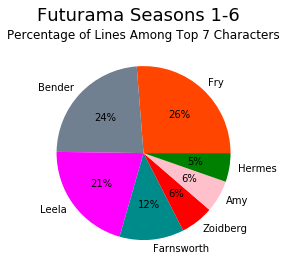

In [4]:
plt.suptitle("Futurama Seasons 1-6", fontsize=18, y=1.01)
plt.title("Percentage of Lines Among Top 7 Characters")
plt.pie(top7, labels=top7.index, autopct='%1.f%%', 
        colors=['orangered', 'slategrey', 'fuchsia', 'darkcyan', 'r', 'pink', 'g'], 
        );
plt.savefig('graphs/lines_top7.png')